In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA


In [2]:
raw_data = pd.read_csv('data/BRAZIL_EXP_COMPLETE.csv',sep=';')

In [3]:
raw_data

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,11,74122000,10,249,SP,4,817600,0,0,3
1,1997,11,73082000,10,97,MG,7,130151,0,4292,6442
2,1997,11,84248119,11,196,SP,1,817800,32,3468,31510
3,1997,11,48239090,10,586,MN,9,910600,0,0,1
4,1997,11,72112910,10,850,SP,1,817800,118,117505,103866
...,...,...,...,...,...,...,...,...,...,...,...
26921048,2023,7,2064900,10,193,SC,1,927800,71380,71380,37378
26921049,2023,8,84379000,10,63,RS,7,1017500,688,688,16865
26921050,2023,1,68053090,10,239,SP,1,817800,945,945,13606
26921051,2023,8,73181900,10,40,SP,4,817600,1152,1152,8962


In [4]:
cols = ['CO_PAIS','SG_UF_NCM','CO_VIA','CO_URF','QT_ESTAT','KG_LIQUIDO','VL_FOB']

In [5]:
X= raw_data[cols].copy()


In [6]:
raw_data

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,11,74122000,10,249,SP,4,817600,0,0,3
1,1997,11,73082000,10,97,MG,7,130151,0,4292,6442
2,1997,11,84248119,11,196,SP,1,817800,32,3468,31510
3,1997,11,48239090,10,586,MN,9,910600,0,0,1
4,1997,11,72112910,10,850,SP,1,817800,118,117505,103866
...,...,...,...,...,...,...,...,...,...,...,...
26921048,2023,7,2064900,10,193,SC,1,927800,71380,71380,37378
26921049,2023,8,84379000,10,63,RS,7,1017500,688,688,16865
26921050,2023,1,68053090,10,239,SP,1,817800,945,945,13606
26921051,2023,8,73181900,10,40,SP,4,817600,1152,1152,8962


In [7]:
le = LabelEncoder()
for col in ['CO_PAIS','SG_UF_NCM','CO_VIA','CO_URF']:
    X[col] = le.fit_transform(X[col])

In [8]:
X.replace(0,pd.NA,inplace=True)
X.dropna(inplace=True)

In [9]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

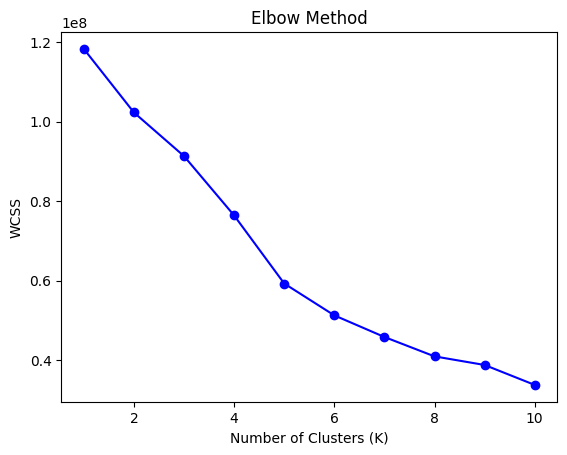

In [11]:
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
train_label = kmeans.fit_predict(X_train_scaled)

In [13]:
test_label = kmeans.predict(X_test_scaled)

In [14]:

y = train_label

In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", train_label.shape)
print("y_test shape :", test_label.shape)

X_train shape: (16898790, 7)
X_test shape : (4224698, 7)
y_train shape: (16898790,)
y_test shape : (4224698,)


In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, train_label)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred = rf.predict(X_test)
print("Akurasi:", accuracy_score(test_label, y_pred))
print(classification_report(test_label, y_pred))

Akurasi: 0.9999498188982976
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1417264
           1       1.00      1.00      1.00    796328
           2       1.00      1.00      1.00   2010990
           4       0.97      0.98      0.98       116

    accuracy                           1.00   4224698
   macro avg       0.99      1.00      0.99   4224698
weighted avg       1.00      1.00      1.00   4224698



In [18]:
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1417264
           1       1.00      1.00      1.00    796328
           2       1.00      1.00      1.00   2010990
           4       0.97      0.98      0.98       116

    accuracy                           1.00   4224698
   macro avg       0.99      1.00      0.99   4224698
weighted avg       1.00      1.00      1.00   4224698

